## Introduction

This notebook is used to explore Boston Airbnb open data posted on https://www.kaggle.com/airbnb/boston, and try to use these data to answer some questions below:

- What is individual cost of renting Airbnb in different areas in Boston?
- How does # of bedrooms affect price?
- What relates to listing pricing?

We are using Listings data source provided

## Induct data and browse it

In [1]:
# import basic packages and look at the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

listings_df = pd.read_csv('./data/listings.csv')
listings_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [2]:
# First, we can look at columns in listings.csv
listings_df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [3]:
# Select some columns for analysis and check missing values in all columns
def percentage(numerator, denomenator):
    '''
    This function can be used to calculate percentage of non-NaN value of all columns
    
    INPUT: 
    numerator - Pandas Series or a number
    denomenator - row count (shape) of Pandas dataframe
    
    OUTPUT:
    Pandas Series of percentage of non-NaN value
    '''
    if type(numerator) == pd.core.series.Series:
        return(numerator/denomenator*100).map('{:.2f}%'.format)
    elif type(numerator) == int or type(numerator) == float:
        return '{.2f%}'.format(float(numerator)/float(denomerator) * 100)
    else:
        print('check type')
        
select_df = listings_df.copy()[['accommodates', 
             'bathrooms', 
             'bedrooms', 
             'beds', 
             'guests_included',
             'extra_people',
             'cleaning_fee',
             'minimum_nights',
             'maximum_nights',
             'price',
             'neighbourhood_cleansed',
             'property_type',
             'room_type',
             'bed_type']]

percentage(select_df.count(), select_df.shape[0])

accommodates              100.00%
bathrooms                  99.61%
bedrooms                   99.72%
beds                       99.75%
guests_included           100.00%
extra_people              100.00%
cleaning_fee               69.12%
minimum_nights            100.00%
maximum_nights            100.00%
price                     100.00%
neighbourhood_cleansed    100.00%
property_type              99.92%
room_type                 100.00%
bed_type                  100.00%
dtype: object

In [4]:
# Now we know there are some missing values in 5 columns
# Let's look at types of selected columns
select_df.dtypes

accommodates                int64
bathrooms                 float64
bedrooms                  float64
beds                      float64
guests_included             int64
extra_people               object
cleaning_fee               object
minimum_nights              int64
maximum_nights              int64
price                      object
neighbourhood_cleansed     object
property_type              object
room_type                  object
bed_type                   object
dtype: object

In [5]:
# extra_people, cleaning_fee and price are not numerical type, we need to take a look at them
select_df.head()

,accommodates,bathrooms,bedrooms,beds,guests_included,extra_people,cleaning_fee,minimum_nights,maximum_nights,price,neighbourhood_cleansed,property_type,room_type,bed_type
0,4,1.5,2.0,3.0,1,$0.00,$35.00,2,1125,$250.00,Roslindale,House,Entire home/apt,Real Bed
1,2,1.0,1.0,1.0,0,$0.00,$10.00,2,15,$65.00,Roslindale,Apartment,Private room,Real Bed
2,2,1.0,1.0,1.0,1,$20.00,NaN,3,45,$65.00,Roslindale,Apartment,Private room,Real Bed
3,4,1.0,1.0,2.0,2,$25.00,$50.00,1,1125,$75.00,Roslindale,House,Private room,Real Bed
4,2,1.5,1.0,2.0,1,$0.00,$15.00,2,31,$79.00,Roslindale,House,Private room,Real Bed


Findings:
- extra_people, cleaning_fee and price are not numerical type, we need to take a look at them
- host_id should be string type, rather than numerical type
- neighbourhood_cleansed can be used to identify areas

Now, we can curate the data and analyze it to answer questions.

## Q1: What is individual cost of renting Airbnb in different areas in Boston?
To answer this question, we need to clean 'price', and calculate average price on individual and area level.

### Clean the data

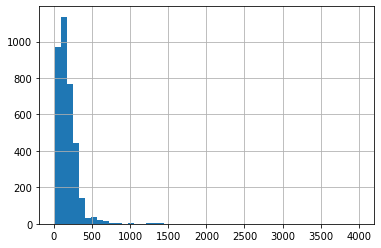

In [6]:
# Look at price first, which is the most important variable we are looking at         
select_df['price'] = select_df['price'].apply(lambda x: x.split('$')[1].replace(',', ''))
select_df['price'] = select_df['price'].astype(float)

select_df['price'].hist(bins=50)

It looks like there most prices are in range of $0 - $1,000, to avoid bias from extreme case, we may limit the range to below $1,000.

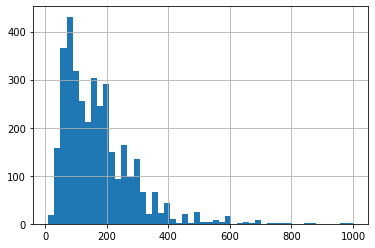

In [7]:
select_df = select_df[(select_df['price']<1000) & (select_df['price']>1)]
select_df['price'].hist(bins=50)

Now we need to calculate individual average cost and aggregage data to area level ('neighbourhood_cleansed')

In [8]:
# Then we need to group all listings by neighbourhood, each having count of listings and average price
select_df['price_per_accommodates'] = select_df['price']/select_df['accommodates']
df1 = select_df.groupby(['neighbourhood_cleansed']) \
                        .agg(count=('price', 'size'), avg_price_per_accommodates=('price_per_accommodates', 'mean'))
print(df1)

                         count  avg_price_per_accommodates
neighbourhood_cleansed                                    
Allston                    260                   45.933274
Back Bay                   301                   79.841825
Bay Village                 24                   74.270833
Beacon Hill                192                   83.697421
Brighton                   185                   52.308632
Charlestown                110                   67.513009
Chinatown                   71                   67.488732
Dorchester                 269                   40.306717
Downtown                   172                   76.290628
East Boston                150                   45.133741
Fenway                     287                   73.821673
Hyde Park                   31                   38.725806
Jamaica Plain              343                   44.936324
Leather District             5                   92.550000
Longwood Medical Area        9                   54.9351

Now we have the count of listings and average individual price by neighbourhood areas. It would be good to plot them in to bar chart to get quick idea.

### Visualization

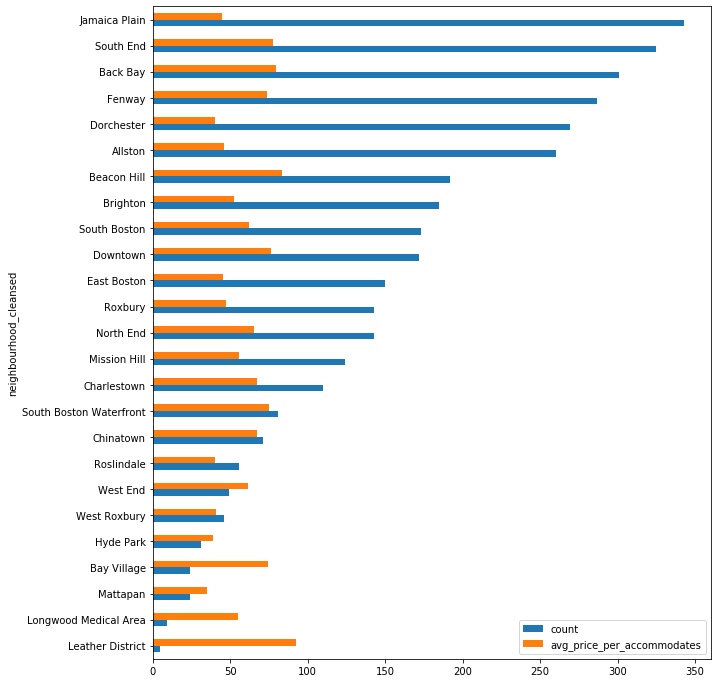

In [9]:
# Visualize using bar chart
df1.sort_values(by='count', ascending=True).plot(kind='barh', figsize=(10,12))

### Analysis
We can clearly see that there are more Airbnb listings around Jamaica Plain than others with comparably low individual's cost, while in Leather District, average individual expense is nearly $100 and available options are very limited.

## Q2: How does # of bedrooms affect price?
To answer this question, we need to add # of bedrooms into consideration, and find the correlation between bedrooms count and average listing price per neighbourhood area

### Prepare the data

In [10]:
# Get related columns
df2 = select_df.copy()[['neighbourhood_cleansed',
                     'bedrooms',
                     'price']]
df2.head()

,neighbourhood_cleansed,bedrooms,price
0,Roslindale,2.0,250.0
1,Roslindale,1.0,65.0
2,Roslindale,1.0,65.0
3,Roslindale,1.0,75.0
4,Roslindale,1.0,79.0


### Visualization
Plot this simple dataframe into heatmap would be good to see their relationship

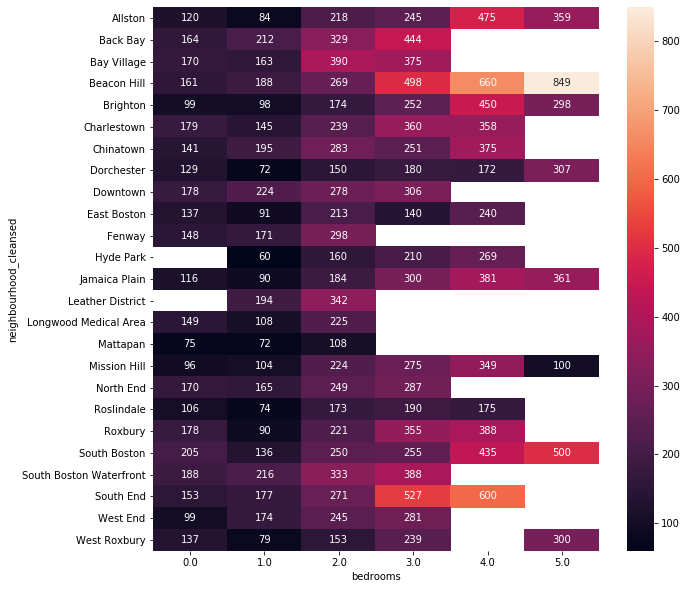

In [11]:
plt.figure(figsize=(10, 10))
sns.heatmap(df2.groupby(['neighbourhood_cleansed','bedrooms']).price.mean().unstack(), annot=True, fmt='.0f')

### Analysis
We can also see Leather District, Longwood Medical Area and Mattapan don't have large house or apartment with more than 2 bedroom, so they may only fit for small group.

## Q3: What relates to listing pricing?
This is a big question that need to involve all the columns we selected and build regression model to analyze correlations across variables.

Therefore, we need to clean the entire selected dataframe to prepare raw data for modeling.

### Prepare the data

In [12]:
# Clean the orignial data
def clean_data(df):
    '''
    INPUT:
    df - original pandas DataFrame
    
    OUTPUT:
    X - matrix holding all variables we need to use to predict price 
    y - the corresponding price vector
    '''
    
    # select columns for further analysis, including numerical and categorical
    raw_df = df.copy()[['accommodates', 
                 'bathrooms', 
                 'bedrooms', 
                 'beds', 
                 'guests_included',
                 'extra_people',
                 'cleaning_fee',
                 'minimum_nights',
                 'maximum_nights',
                 'price',
                 'neighbourhood_cleansed',
                 'property_type',
                 'room_type',
                 'bed_type']]
    
    # drop missing price rows, if any         
    raw_df['price'] = raw_df['price'].apply(lambda x: x.split('$')[1].replace(',', ''))
    raw_df['price'] = raw_df['price'].astype(float)
    raw_df = raw_df[(raw_df['price']<1000) & (raw_df['price']>1)]
    y = raw_df['price']
 
    # fill missing values in columns with different methods
    fill_zero_cols = ['bathrooms', 'bedrooms', 'beds']
    for col in fill_zero_cols:
        raw_df[col].fillna(0, inplace=True)
        
    # convert other currency strings to float type
    raw_df['extra_people'] = raw_df['extra_people'].apply(lambda x: x.split('$')[1].replace(',', ''))
    raw_df['extra_people'] = raw_df['extra_people'].astype(float)
    
    raw_df['cleaning_fee'].fillna('$0.00', inplace=True)
    raw_df['cleaning_fee'] = raw_df['cleaning_fee'].apply(lambda x: x.split('$')[1].replace(',', ''))
    raw_df['cleaning_fee'] = raw_df['cleaning_fee'].astype(float)
    
    X = raw_df.drop(['price'], axis=1)
    
    # dummy the categorical variables
    cat_vars = X.select_dtypes(include=['object']).copy().columns
    for var in cat_vars:
        X = pd.concat([X.drop(var, axis=1), 
                           pd.get_dummies(X[var], 
                                          prefix=var, 
                                          prefix_sep='_', 
                                          drop_first=True)], 
                           axis=1)


    return raw_df, X, y
    
raw_df, X, y = clean_data(listings_df) 

In [13]:
percentage(raw_df.count(), raw_df.shape[0])

accommodates              100.00%
bathrooms                 100.00%
bedrooms                  100.00%
beds                      100.00%
guests_included           100.00%
extra_people              100.00%
cleaning_fee              100.00%
minimum_nights            100.00%
maximum_nights            100.00%
price                     100.00%
neighbourhood_cleansed    100.00%
property_type              99.92%
room_type                 100.00%
bed_type                  100.00%
dtype: object

### Visualization
Look at all numerical variables and see their distribution

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd760d87110>,
      dtype=object)

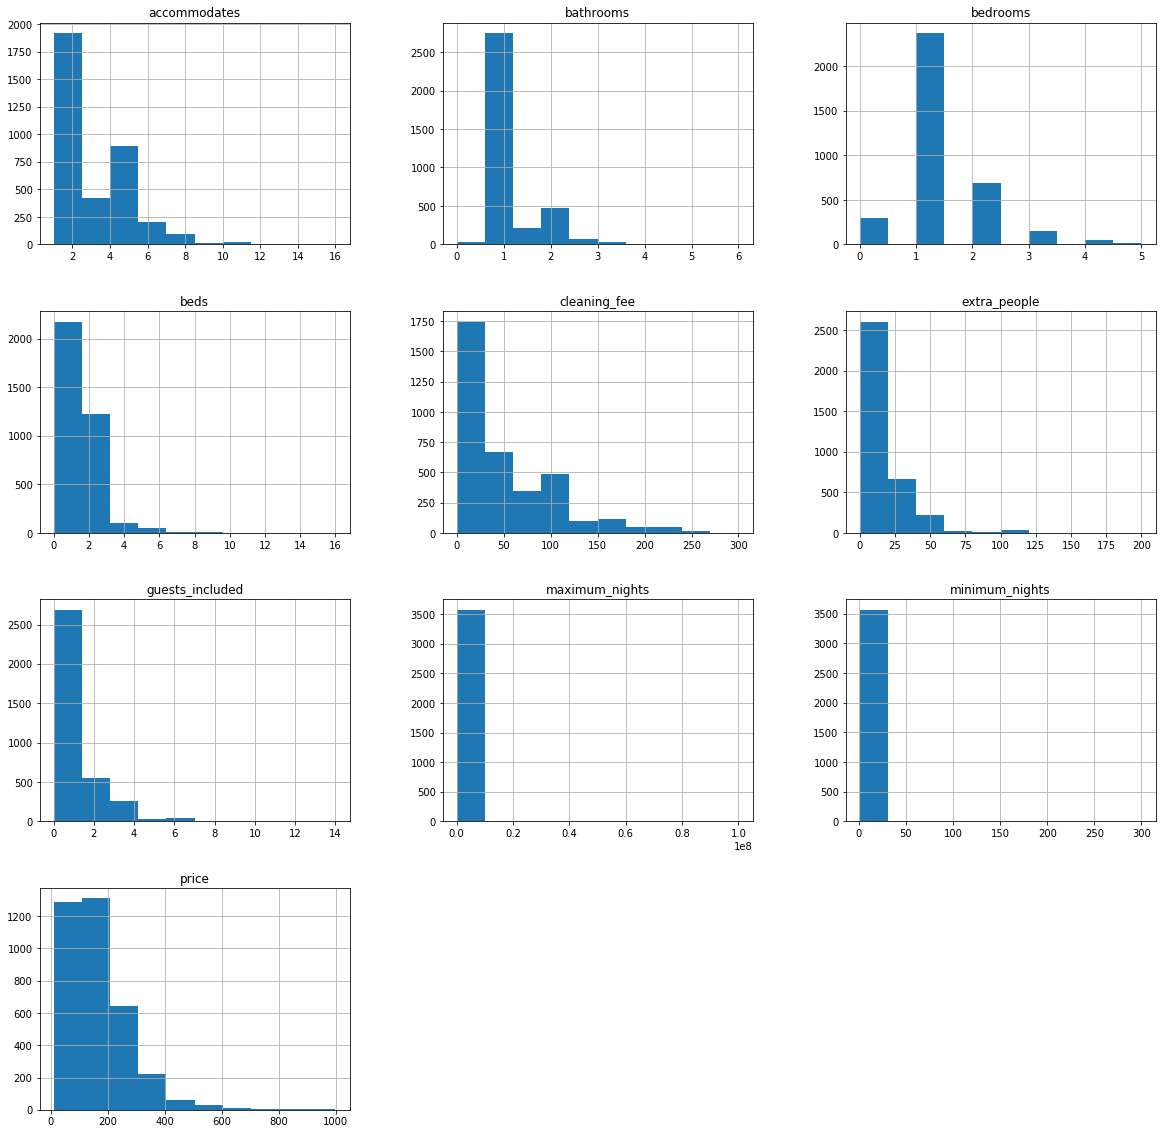

In [14]:
raw_df.hist(figsize=(20,20))

### Modeling with LinearRegression

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
lm_model = LinearRegression(normalize=True)
lm_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [16]:
# Look at R-squared score for the model

y_train_preds = lm_model.predict(X_train)
train_r2_score = r2_score(y_train, y_train_preds)
y_test_preds = lm_model.predict(X_test)
test_r2_score = r2_score(y_test, y_test_preds)

print("The r-squared score for model on train set was {} on {} values.".format(train_r2_score, len(y_train)))
print("The r-squared score for model on test set was {} on {} values.".format(test_r2_score, len(y_test)))

The r-squared score for model on train set was 0.5843296496798192 on 2858 values.
The r-squared score for model on test set was 0.478813781871792 on 715 values.


The R-squared score shows that 58% of the variance can be explained by our model in train set, and 48% of the variance can be explained in test set.

### Coefficients
Let's now look at the coefficients and see how do they effect the model.

In [17]:
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
coef_df.head(20)

,est_int,coefs,abs_coefs
10,neighbourhood_cleansed_Bay Village,107.967419,107.967419
21,neighbourhood_cleansed_Leather District,105.445176,105.445176
29,neighbourhood_cleansed_South Boston Waterfront,102.844649,102.844649
9,neighbourhood_cleansed_Back Bay,98.050798,98.050798
16,neighbourhood_cleansed_Downtown,84.805251,84.805251
11,neighbourhood_cleansed_Beacon Hill,81.684115,81.684115
14,neighbourhood_cleansed_Chinatown,72.548987,72.548987
30,neighbourhood_cleansed_South End,70.386963,70.386963
46,room_type_Shared room,-67.437883,67.437883
18,neighbourhood_cleansed_Fenway,65.736596,65.736596


According to the data above, we can get following conclusion:
- neighbourhood_cleansed, room_type and property_type are top indicators for listing price
- bedrooms seems to be a better indicator than beds